<a href="https://colab.research.google.com/github/Francanela/postech-ia-para-devs/blob/main/tech-challenge-fase-1%5Ctech-challenge-grupo-31.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tech Challenge: Prever Custos Médicos

O desafio consiste em desenvolver um modelo preditivo de regressão para prever os custos médicos individuais com base em variáveis como idade, gênero, IMC (Índice de Massa Corporal), número de filhos, se a pessoa é fumante ou não, e a região onde mora.

### Tarefas:
1. Explorar os dados (simulados ou utilizando datasets públicos).
2. Pré-processar os dados para adequar ao modelo de regressão.
3. Criar um modelo preditivo de regressão.
4. Treinar o modelo e avaliar sua performance utilizando métricas estatísticas.
5. Apresentar resultados visuais, como gráficos de previsões vs. valores reais.

### Base de dados

A base de dados utilizada nesse notebook, segue o modelo definido pelo exercício. Ela contém os seguintes atributos, com informações individuais de usuários de planos de saúde:

*   **Age:** Idade do beneficiário
*   **Gender:** Gênero do benefiário (male / female)
*   **BMI:**   *Índice de massa corporal*. Medida internacional usada para calcular se uma pessoa está no peso ideal, calculado a partir da relação entre altura e peso (kg / m ^ 2), idealmente os valores considerados saudáveis devem ficar entre 18,5 a 24,9.
*   **Children:** Quantidade de filhos do beneficiário, cobertos pelo plano de saúde
*   **Smoker:** Indica se o beneficiário é fumante ou não
*   **Region:** Região geográfica da localização do beneficiário. Considerando regiões dos EUA ( northeast, southeast, southwest, northwest).
*   **Charges:** Valores gastos com plano de saúde


###Fonte Kaggle: [insurance.csv](https://www.kaggle.com/datasets/mirichoi0218/insurance)

## 1. Importando as bibliotecas necessárias para o projeto

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#TO-DO

In [42]:
# --  REMOVER ESSE TRECHO DADOS TOTALMENTE RANDOMIZADOS NÃO SÃO VIAVEIS PARA FIM DE TREINAMENTO DO MODELO - VER COM O GRUPO

# 1. SIMULANDO OS DADOS
# ============================================

# Gerar dados simulados para o desafio
np.random.seed(42)
data = {
    'idade': np.random.randint(18, 65, 1000),
    'genero': np.random.choice(['masculino', 'feminino'], 1000),
    'imc': np.random.uniform(15, 40, 1000),
    'filhos': np.random.randint(0, 5, 1000),
    'fumante': np.random.choice(['sim', 'não'], 1000),
    'região': np.random.choice(['nordeste', 'sudoeste', 'noroeste', 'sudeste'], 1000),
    'encargos': np.random.uniform(2000, 50000, 1000)  # Custos médicos (alvo)
}

# Criar o DataFrame com os dados simulados
df_simulado = pd.DataFrame(data)

# Exibir os primeiros dados
print("Exemplo dos dados simulados:")
print(df_simulado.head())

Exemplo dos dados simulados:
   idade     genero        imc  filhos fumante    região      encargos
0     56  masculino  32.082384       0     sim  sudoeste  17242.619834
1     46   feminino  26.147568       2     sim   sudeste  14450.643236
2     32   feminino  21.840667       2     não  sudoeste   6204.382275
3     60   feminino  39.928113       2     sim  sudoeste   6315.979753
4     25  masculino  25.654533       1     sim  noroeste  11275.971931


## 2. Carregando dados

In [43]:
import pandas as pd
# URL dos dados de custos médicos
url = 'https://raw.githubusercontent.com/Francanela/postech-ia-para-devs/refs/heads/main/tech-challenge-fase-1/datasource/insurance.csv'

# Ler os dados diretamente do link
df = pd.read_csv(url)

# Renomear as colunas de inglês para português
df.rename(columns={
    'age': 'idade',
    'sex': 'genero',
    'bmi': 'imc',
    'children': 'filhos',
    'smoker': 'fumante',
    'region': 'região',
    'charges': 'encargos'
}, inplace=True)

# Exibir as primeiras linhas para confirmar a renomeação
print("Colunas após renomeação:")
print(df.head())

Colunas após renomeação:
   idade  genero     imc  filhos fumante     região     encargos
0     19  female  27.900       0     yes  southwest  16884.92400
1     18    male  33.770       1      no  southeast   1725.55230
2     28    male  33.000       3      no  southeast   4449.46200
3     33    male  22.705       0      no  northwest  21984.47061
4     32    male  28.880       0      no  northwest   3866.85520


## 3. PRÉ-PROCESSAMENTO DOS DADOS

### Limpeza dos dados
Etapas para garantir a qualidade dos dados

* Verificação de valores nulos:

    Como não há valores nulos não é necessário tratamento



In [44]:
df.isnull().any()

,0
idade,False
genero,False
imc,False
filhos,False
fumante,False
região,False
encargos,False


* Remoção de linhas duplicadas:

    Foi utilizado drop_duplicates() para remover linhas duplicadas no dataset.

    **Justificativa**: Linhas duplicadas podem causar viés no modelo preditivo, não é possível identificar se são dois registros distintos uma vez que não possuímos um identificador único e existe apenas uma incidencia.


In [45]:
df.duplicated().value_counts()

,count
False,1337
True,1


In [46]:
df.drop_duplicates(inplace=True)

### EDA - Análise exploratória dos dados

Vamos analisar quantos dados existem na nossa base

In [47]:
df.shape

(1337, 7)

Agora vamos analisar o formato dos dados

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   idade     1337 non-null   int64  
 1   genero    1337 non-null   object 
 2   imc       1337 non-null   float64
 3   filhos    1337 non-null   int64  
 4   fumante   1337 non-null   object 
 5   região    1337 non-null   object 
 6   encargos  1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [49]:
df.head()

,idade,genero,imc,filhos,fumante,região,encargos
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Podemos perceber que as propriedades age, bmi, children e charges são numéricas. Já as propriedades sex, smoker e region são propriedades categóricas.

Considerando as variáveis numéricas, vamos ver a distribuição delas em gráficos

array([[<Axes: title={'center': 'idade'}>,
        <Axes: title={'center': 'imc'}>],
       [<Axes: title={'center': 'filhos'}>,
        <Axes: title={'center': 'encargos'}>]], dtype=object)

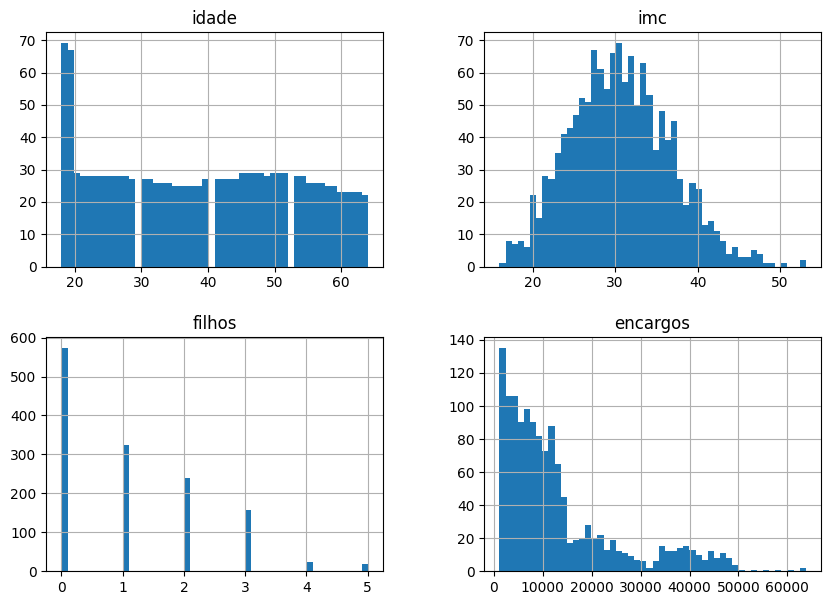

In [50]:
df.hist(bins=50, figsize=(10,7))

Podemos concluir a partir dos gráficos acima que:

*   A maioria dos usuários de planos de saúde, são pessoas jovens e sem filhos.
*   A maioria dos usuários está acima do peso. Considerando que a classificação do IMC para sobrepeso tem como base valores entre 25 e 39
*   Os valores possuem dimensões diferentes, Talvez seja necessário normalizar os dados


Vamos analisar a distribuição das propriedades utilizando gráficos de Boxplot

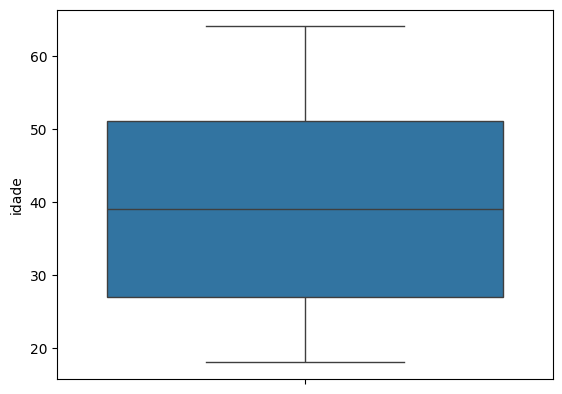

In [51]:
sns.boxplot(data=df, y='idade');

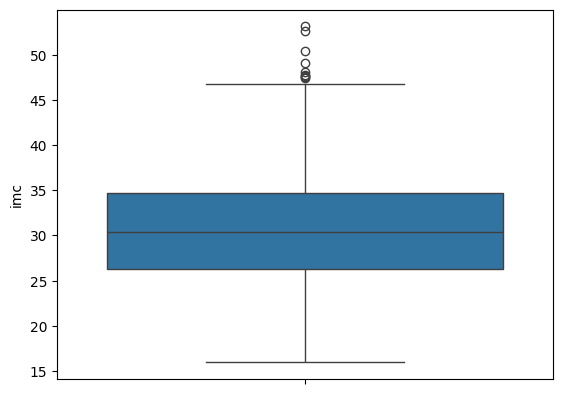

In [52]:
sns.boxplot(data=df, y='imc');

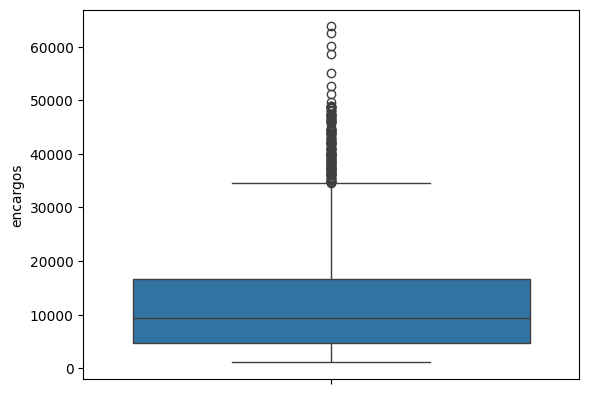

In [53]:
sns.boxplot(data=df, y='encargos');

Podemos observar que existem outliers nos valores de gastos e IMC. É interessante analisar a performance do modelo com e sem os outliers na base.


Vamos agora analisar a relação entre as variáveis nos seguintes cenários:

 - Qual a proporção de gastos em relação ao sexo do usuário
 - Qual a proporção de gastos em relação a idade
 - Qual a proporção de gastos em relação ao BMI
 - Qual a proporção de gastos em relação ao fato de ser fumante / não
 - Qual a proporção de gastos em relação a quantidade de crianças

#### Gastos x Sexo

Vamos primeiro analisar a quantidade de homens e mulheres na nossa base

<Axes: xlabel='genero', ylabel='count'>

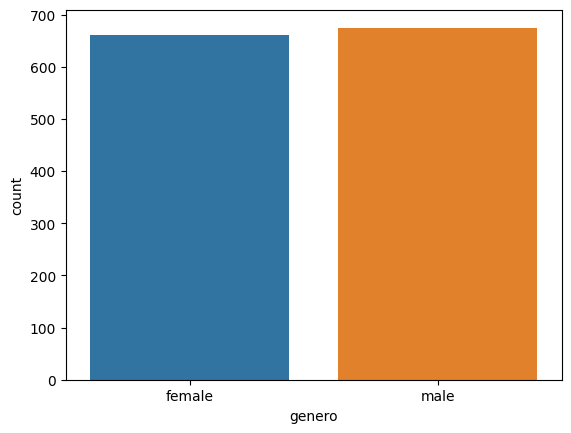

In [54]:
sns.countplot(x = 'genero', hue = 'genero', data = df)

Nossa base de dados está bem balanceada em relação à quantidade de usuários homens e mulheres. Não existe uma diferença significativa entre eles.

Agora vamos analisar a diferença de gastos, em média, entre homens e mulheres

#### Gastos x IMC

Vamos analisar a relação entre IMC (bmi) e gastos

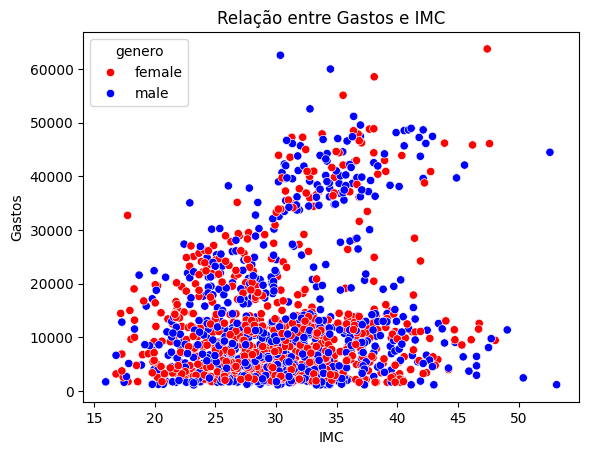

In [58]:
  sns.scatterplot(x='imc', y='encargos',  hue='genero', data=df,palette={'male': 'blue', 'female': 'red'})
  plt.title('Relação entre Gastos e IMC')
  plt.xlabel('IMC')
  plt.ylabel('Gastos')
  plt.show()

In [11]:
# Transformar variáveis categóricas em variáveis dummy (0 ou 1)
df_preprocessado = pd.get_dummies(df_simulado, drop_first=True)

# Separar variáveis independentes (X) e dependentes (y)
X = df_preprocessado.drop('encargos', axis=1)  # Variáveis preditoras
y = df_preprocessado['encargos']  # Variável alvo (custos médicos)

# Dividir os dados em conjunto de treino e teste (80% treino e 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# ============================================
# 4. TREINAMENTO DO MODELO DE REGRESSÃO
# ============================================

# Instanciar o modelo de regressão linear ... @CESAR: Validar com o Estatístico do Grupo
modelo = LinearRegression()

# Treinar o modelo com o conjunto de treinamento
modelo.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = modelo.predict(X_test)

# ============================================
# 5. AVALIAÇÃO DO MODELO
# ============================================

# Calcular o erro quadrático médio (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calcular o coeficiente de determinação (R²)
r2 = r2_score(y_test, y_pred)

# Exibir as métricas
print("\nAvaliação do modelo:")
print(f"Erro Quadrático Médio (MSE): {mse}")
print(f"Coeficiente de Determinação (R²): {r2}")


Avaliação do modelo:
Erro Quadrático Médio (MSE): 33596915.85136145
Coeficiente de Determinação (R²): 0.7835929767120724


In [ ]:
# ============================================
# 4.1 TREINAMENTO DO MODELO DE REGRESSÃO Com statsmodels
# ============================================
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# URL dos dados de custos médicos
url = 'https://raw.githubusercontent.com/adiag321/Medical-Insurance-Cost-Prediction/refs/heads/main/data/insurance.csv'

# Ler os dados diretamente do link
df = pd.read_csv(url)

# Renomear as colunas de inglês para português
df.rename(columns={
    'age': 'idade',
    'sex': 'gênero',
    'bmi': 'imc',
    'children': 'filhos',
    'smoker': 'fumante',
    'region': 'região',
    'charges': 'encargos'
}, inplace=True)

# Converter variáveis categóricas em variáveis dummy (0 e 1)
df_preprocessado = pd.get_dummies(df, drop_first=True)

# Verificar e converter colunas booleanas para int (0 e 1)
df_preprocessado = df_preprocessado.astype(int)

# Verificar se todas as colunas são numéricas
print("Tipos de dados após a conversão:")
print(df_preprocessado.dtypes)

# Separando as variáveis independentes (X) e a dependente (y)
X = df_preprocessado.drop('encargos', axis=1)  # Variáveis preditoras
y = df_preprocessado['encargos']  # Variável alvo

# Adicionar uma constante para o modelo (intercepto)
X = sm.add_constant(X)

# Dividindo os dados em conjuntos de treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo de regressão com statsmodels
modelo = sm.OLS(y_train, X_train).fit()

# Fazer previsões no conjunto de teste
y_pred = modelo.predict(X_test)

# Exibir o resumo dos resultados do modelo
print(modelo.summary())


Tipos de dados após a conversão:
idade               int64
imc                 int64
filhos              int64
encargos            int64
gênero_male         int64
fumante_yes         int64
região_northwest    int64
região_southeast    int64
região_southwest    int64
dtype: object
                            OLS Regression Results                            
Dep. Variable:               encargos   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     380.7
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          1.60e-305
Time:                        01:31:15   Log-Likelihood:                -10846.
No. Observations:                1070   AIC:                         2.171e+04
Df Residuals:                    1061   BIC:                         2.175e+04
Df Model:                           8                                         
Covarian

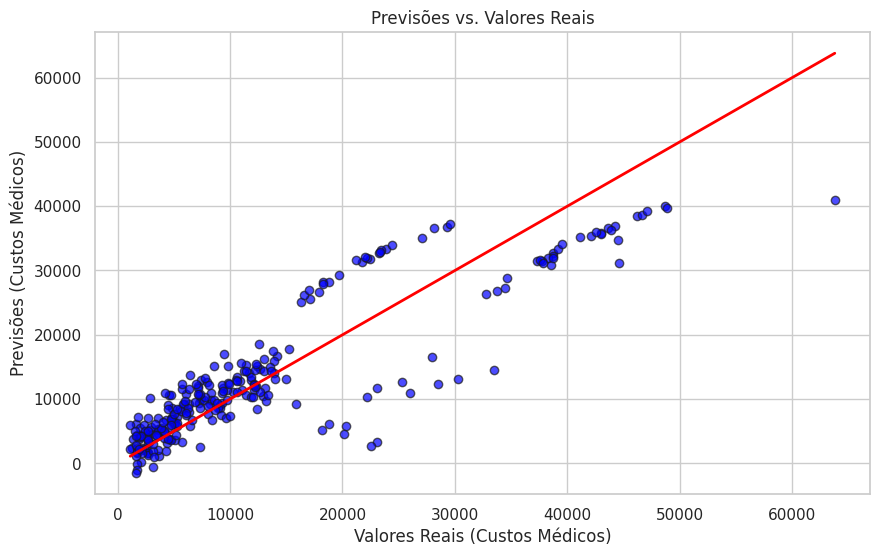

In [ ]:
# ============================================
# 6. VISUALIZAÇÃO DOS RESULTADOS
# ============================================

# Comparar previsões com os valores reais
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('Previsões vs. Valores Reais')
plt.xlabel('Valores Reais (Custos Médicos)')
plt.ylabel('Previsões (Custos Médicos)')
plt.show()

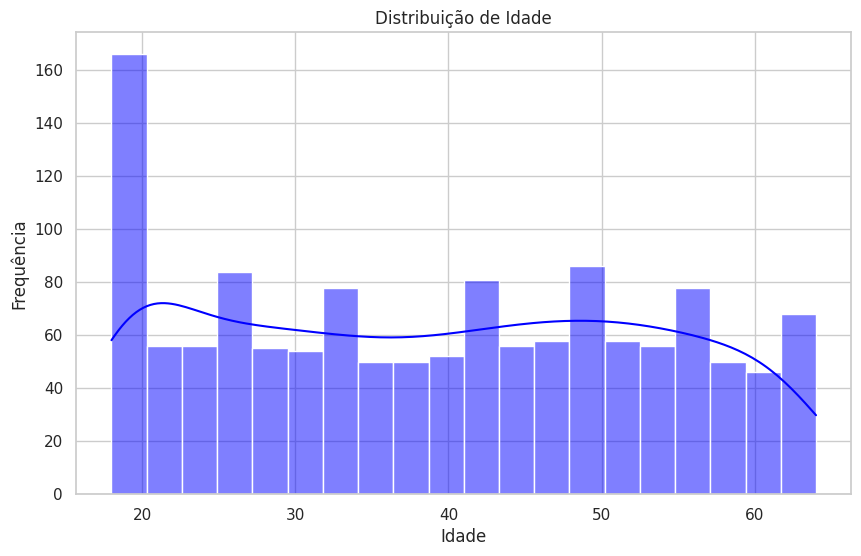

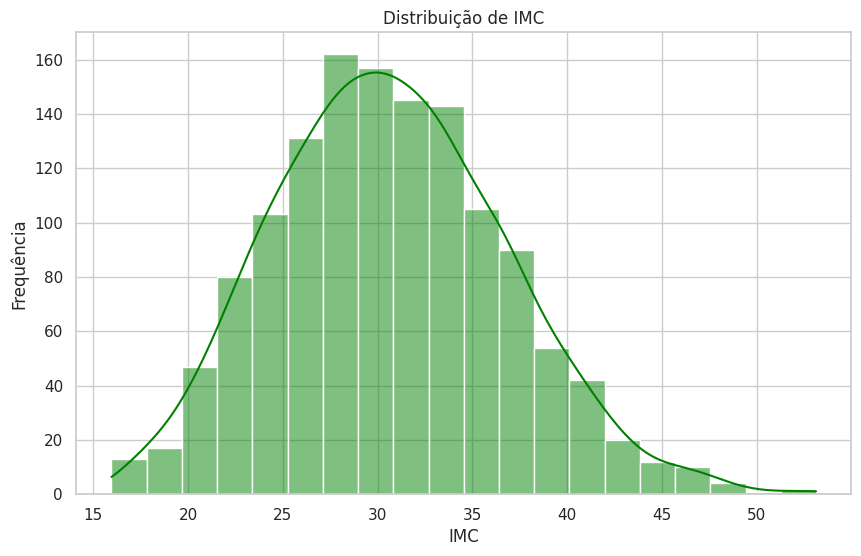

<ipython-input-39-53b1d1d9579e>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_simulado, x='gênero', palette='Set2')


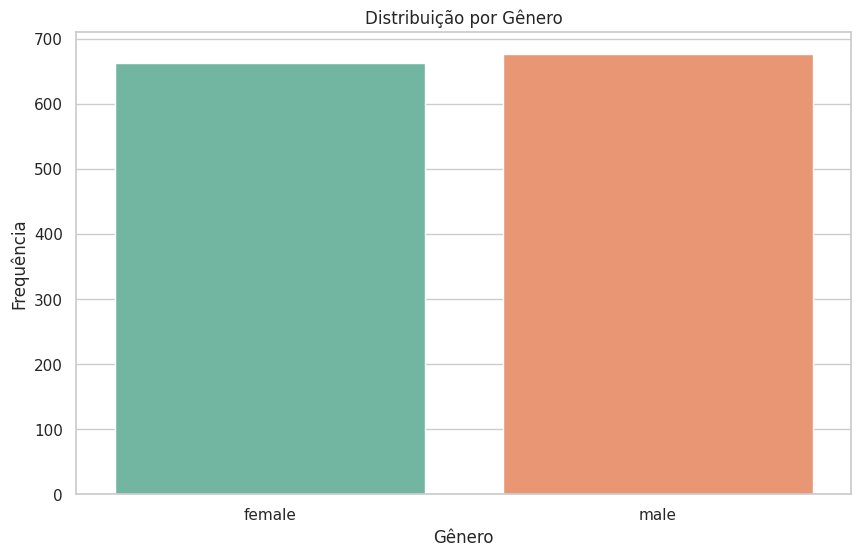

<ipython-input-39-53b1d1d9579e>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_simulado, x='fumante', palette='Set1')


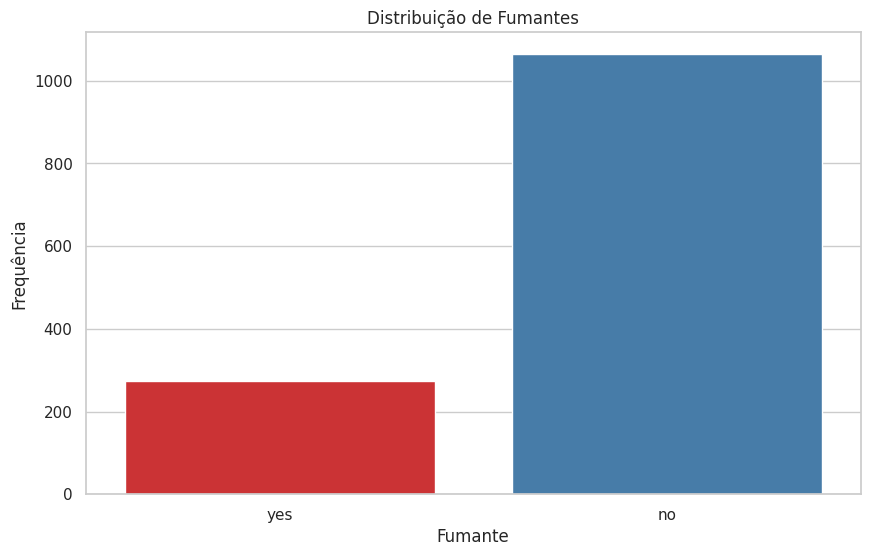

<ipython-input-39-53b1d1d9579e>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_simulado, x='região', palette='Set3')


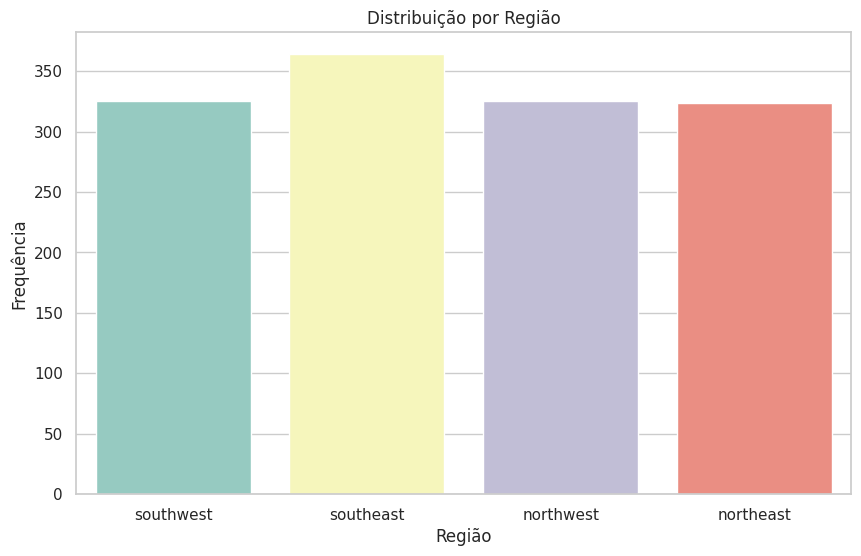

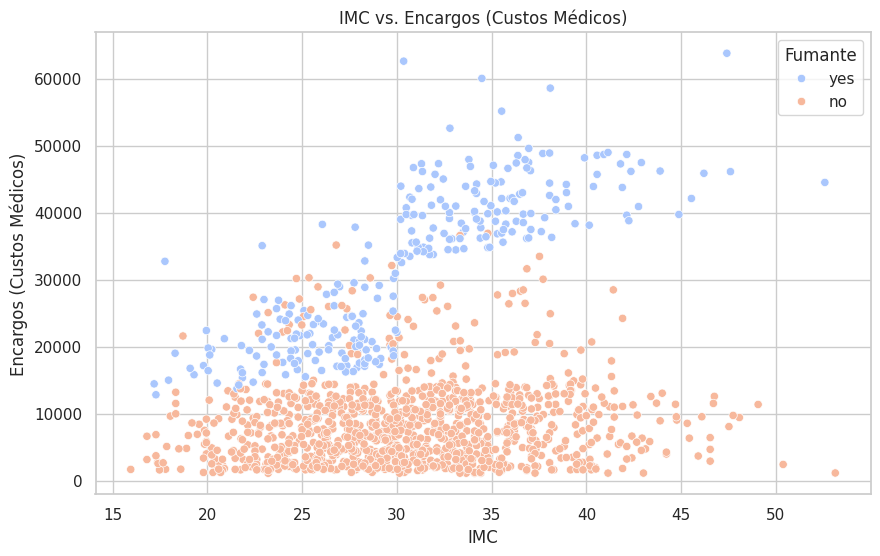

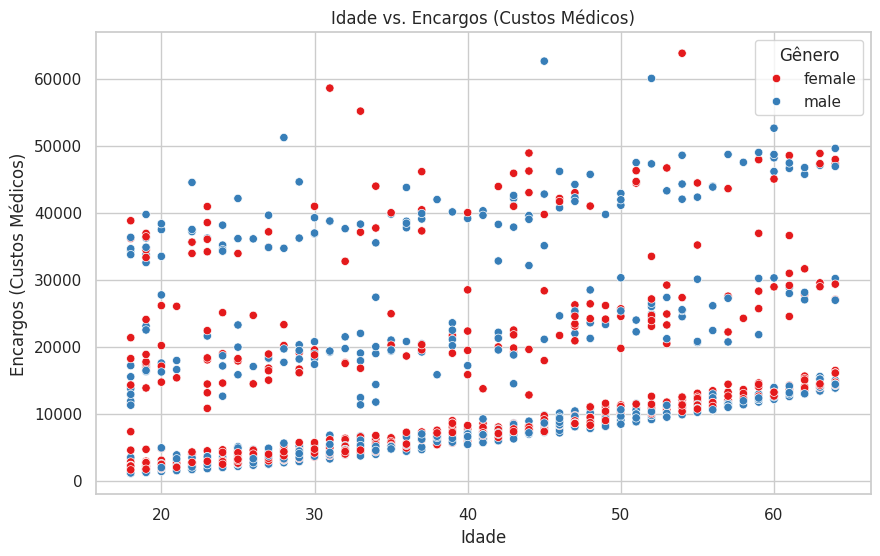

In [ ]:
# ============================================
# 7. VISUALIZAÇÃO SIMPLES E INTUITIVA DOS DADOS
# ============================================

import seaborn as sns

# Configurar estilo dos gráficos
sns.set(style="whitegrid")

# Gráfico de distribuição de Idade
plt.figure(figsize=(10, 6))
sns.histplot(df_simulado['idade'], bins=20, kde=True, color='blue')
plt.title('Distribuição de Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

# Gráfico de distribuição do IMC
plt.figure(figsize=(10, 6))
sns.histplot(df_simulado['imc'], bins=20, kde=True, color='green')
plt.title('Distribuição de IMC')
plt.xlabel('IMC')
plt.ylabel('Frequência')
plt.show()

# Gráfico de barras para variáveis categóricas (Gênero)
plt.figure(figsize=(10, 6))
sns.countplot(data=df_simulado, x='gênero', palette='Set2')
plt.title('Distribuição por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Frequência')
plt.show()

# Gráfico de barras para variáveis categóricas (Fumante)
plt.figure(figsize=(10, 6))
sns.countplot(data=df_simulado, x='fumante', palette='Set1')
plt.title('Distribuição de Fumantes')
plt.xlabel('Fumante')
plt.ylabel('Frequência')
plt.show()

# Gráfico de barras para variáveis categóricas (Região)
plt.figure(figsize=(10, 6))
sns.countplot(data=df_simulado, x='região', palette='Set3')
plt.title('Distribuição por Região')
plt.xlabel('Região')
plt.ylabel('Frequência')
plt.show()

# Gráfico de dispersão entre IMC e Encargos (custos médicos)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_simulado, x='imc', y='encargos', hue='fumante', palette='coolwarm')
plt.title('IMC vs. Encargos (Custos Médicos)')
plt.xlabel('IMC')
plt.ylabel('Encargos (Custos Médicos)')
plt.legend(title='Fumante')
plt.show()

# Gráfico de dispersão entre Idade e Encargos
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_simulado, x='idade', y='encargos', hue='gênero', palette='Set1')
plt.title('Idade vs. Encargos (Custos Médicos)')
plt.xlabel('Idade')
plt.ylabel('Encargos (Custos Médicos)')
plt.legend(title='Gênero')
plt.show()


Checklist baseado nas instruções do Tech Challenge:

1 - Exploração de Dados:

 Carregar a base de dados.
 Explorar as características dos dados (idade, gênero, IMC, filhos, fumante, região, encargos).
 Analisar estatísticas descritivas e visualizar distribuições relevantes.
2 - Pré-processamento de Dados:

 Limpar os dados, tratando valores ausentes (se necessário).
 Converter variáveis categóricas para formatos adequados à modelagem.
3 - Modelagem:

 Criar um modelo preditivo de regressão (ex: Regressão Linear, Árvores de Decisão).
 Dividir os dados em conjuntos de treinamento e teste.
4 - Treinamento e Avaliação do Modelo:

 Treinar o modelo com o conjunto de treinamento.

5- Validação Estatística:

 Validar o modelo com métricas estatísticas (p-value, intervalos de confiança).
 Apresentar resultados visuais (gráficos de previsões vs. valores reais).

6 - Relatório Final:

 Elaborar um relatório com análise dos resultados, insights e validação estatística.

7 - Entregáveis:

 Criar um vídeo apresentando o projeto (plataforma sugerida: YouTube).
 Enviar o link do GitHub com o código desenvolvido.
 Enviar o vídeo explicando o passo a passo do projeto.



| **Biblioteca** | **Descrição** |
|----------------|---------------|
| **NumPy**      | NumPy é usada para operações com arrays e funções matemáticas. Neste projeto, foi utilizada para gerar dados simulados. |
| **Pandas**     | Pandas é usada para manipulação e análise de dados tabulares. Foi utilizada para criar e explorar DataFrames. |
| **Seaborn**    | Seaborn é uma biblioteca de visualização de dados. Utilizada para criar gráficos de distribuição e barras de forma simples e intuitiva. |
| **Matplotlib** | Matplotlib é uma biblioteca de gráficos 2D. Usada para gerar gráficos de dispersão, comparando previsões com valores reais. |
| **Scikit-learn (sklearn)** | Biblioteca para aprendizado de máquina. Utilizada para modelagem e avaliação de regressão (Regressão Linear, divisão de dados, métricas de desempenho). |
